In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_poly.pkl")
print(df_general_poly3dim_results.shape[0])
results = df_general_poly3dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

100


,Model,SINR
0,WSM,27.301444


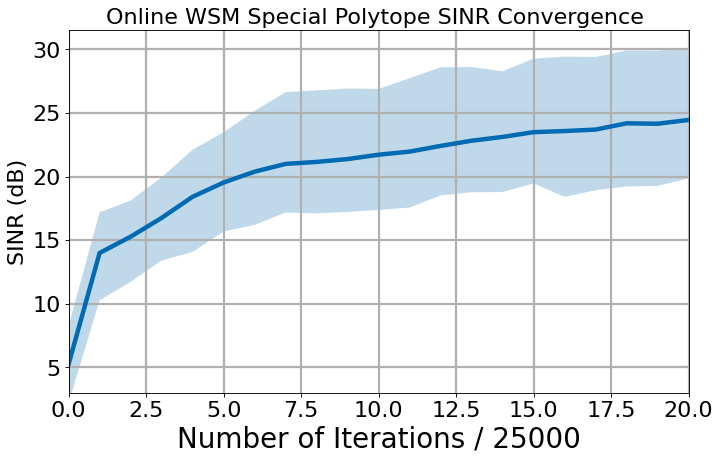

In [14]:
data = np.stack(df_general_poly3dim_results.loc[ (df_general_poly3dim_results['Model'] == "WSM")]['SIRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, mean_.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online WSM Special Polytope SINR Convergence ")
plt.axis([0.0,20.0,3,31.5])
ApplyFont(plt.gca())